<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lab:-Regression-Analysis" data-toc-modified-id="Lab:-Regression-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lab: Regression Analysis</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Before-you-start:" data-toc-modified-id="Before-you-start:-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Before you start:</a></span></li></ul></li><li><span><a href="#Challenge-1" data-toc-modified-id="Challenge-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Challenge 1</a></span></li><li><span><a href="#Challenge-2" data-toc-modified-id="Challenge-2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Challenge 2</a></span></li><li><span><a href="#Bonus-Challenge:-Error-Analysis" data-toc-modified-id="Bonus-Challenge:-Error-Analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Bonus Challenge: Error Analysis</a></span></li></ul></li></ul></div>

# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [5]:
import pandas as pd
student_data = pd.DataFrame({'StudentID': [1,2,3,4,5,6,7,8,9,10]
                             ,'Age': [17,51,27,21,36,48,19,26,54,30]
                             , 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

In [6]:
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

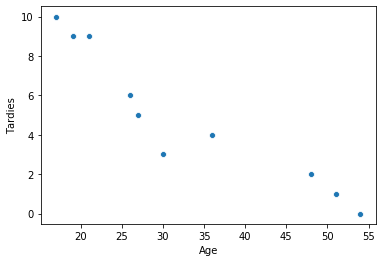

In [10]:
import seaborn as sns
sns.scatterplot(data=student_data, x='Age', y='Tardies');

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

We can see a trend where the older the students are, the less often they are late/less number of tardies they have

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [11]:
student_data.corr()

,StudentID,Age,Tardies
StudentID,1.000000,0.186190,-0.347113
Age,0.186190,1.000000,-0.939163
Tardies,-0.347113,-0.939163,1.000000


In [13]:
student_data.cov()

,StudentID,Age,Tardies
StudentID,9.166667,7.722222,-3.722222
Age,7.722222,187.655556,-45.566667
Tardies,-3.722222,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [16]:
from statsmodels.formula.api import ols
model=ols('Tardies ~ Age', data=student_data)
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           5.57e-05
Time:                        12:26:41   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

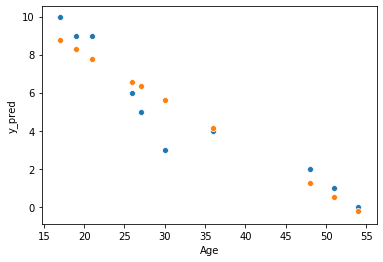

In [19]:
y_pred=model_fit.predict()
student_data['y_pred']=y_pred
sns.scatterplot(data=student_data, x='Age', y='Tardies');
sns.scatterplot(data=student_data, x='Age', y='y_pred');

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

**There a couple of outliers in the model but overall it follows a linear distribution. So we can assume that age is a good predictor of tardiness**

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [20]:
vehicles=pd.read_csv(r'C:\Users\Tiago McDonald\Documents\GitHub\248_Repo\Labs\module_2\Regression-Analysis\vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [28]:
vehicles.corr()['CO2 Emission Grams/Mile'].sort_values()

Highway MPG               -0.926405
Combined MPG              -0.926229
City MPG                  -0.894139
Year                      -0.222300
Cylinders                  0.752393
Engine Displacement        0.803520
Fuel Cost/Year             0.930865
Fuel Barrels/Year          0.986189
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64

The Fuel Barrels/Year is the variable that has the highest correlation with the CO2 emissions. The variable that provides the least amount of information is the Year

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [39]:
model=ols('CO2_Emission_Grams_Mile ~ FuelBarrelsYear', data=vehicles)
model_fit=model.fit()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [40]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.973
Model:                                 OLS   Adj. R-squared:                  0.973
Method:                      Least Squares   F-statistic:                 1.275e+06
Date:                     Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                             12:56:04   Log-Likelihood:            -1.5821e+05
No. Observations:                    35952   AIC:                         3.164e+05
Df Residuals:                        35950   BIC:                         3.164e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          12.4865      0.423     29.523      0.000      11.658      13.316
FuelBarrelsYear    26.2836      0.023   1128.967      0.000      26.238      26.329
==============================================================================
Omnibus:                    88540.411   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        957228555.961
Skew:                          26.696   Prob(JB):                         0.00
Kurtosis:                     800.592   Cond. No.                         74.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [41]:
people = pd.DataFrame({'X': [1,3,4,6,8,9,11,14]
                        ,'Y': [1,2,4,4,5,7,8,13]
                      })

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

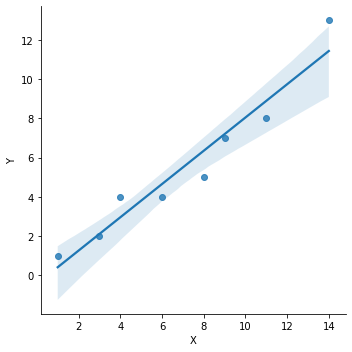

In [43]:
sns.lmplot(data=people, x='X', y='Y');

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [44]:
model=ols('Y ~ X', data=people)
model_fit=model.fit()

In [45]:
model_fit.summary()

C:\Users\Tiago McDonald\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           0.000102
Time:                        13:00:11   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4394      0.759     -0.579      0.584      -2.297       1.418
X              0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 